# This code is written mainly to ascertain the differences between different kernels of SVR and Linear & Polynomial Regression.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

Reading the data

In [6]:
data = pd.read_csv("C:/Users/ahmet/OneDrive/Masaüstü/Python Files/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Obtaining the necessary columns as dataframes

In [7]:
x = data.iloc[:,1:2] #level
y = data.iloc[:,2:]  #salary

In [8]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [9]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


Data conversion from dataframe to numpy array

In [10]:
X = x.values
Y = y.values

Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg1 = LinearRegression()
lin_reg1.fit(X, Y)

LinearRegression()

Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, Y)

LinearRegression()

Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2 = StandardScaler()
y_scaled = sc2.fit_transform(Y)

In [17]:
x_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [18]:
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Support Vector Regression (SVR) Model

In [14]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf")
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly")

svr_rbf.fit(x_scaled, y_scaled.ravel())
svr_lin.fit(x_scaled, y_scaled.ravel())
svr_poly.fit(x_scaled, y_scaled.ravel())

SVR(kernel='poly')

### Visualisation

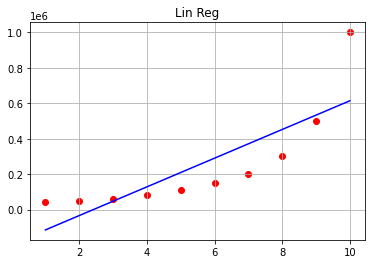

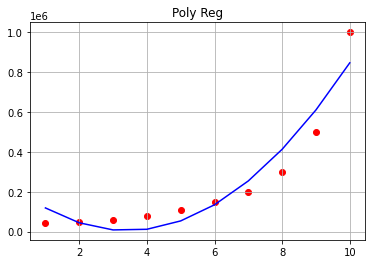

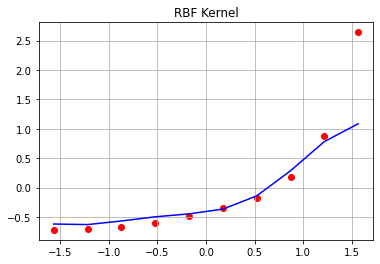

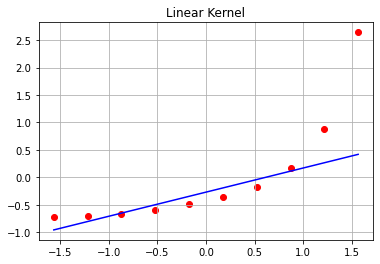

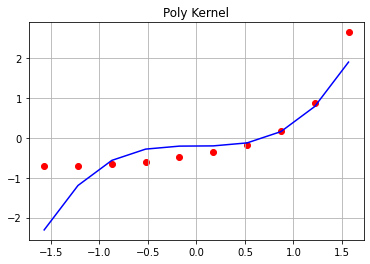

In [16]:
plt.scatter(X, Y, color="r")
plt.plot(X, lin_reg1.predict(X), color="b")
plt.title("Lin Reg")
plt.grid(True)
plt.show()

plt.scatter(X, Y, color="r")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color="b")
plt.title("Poly Reg")
plt.grid(True)
plt.show()

plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_rbf.predict(x_scaled), color="b")
plt.title("RBF Kernel")
plt.grid(True)
plt.show()

plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_lin.predict(x_scaled), color="b")
plt.title("Linear Kernel")
plt.grid(True)
plt.show()

plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_poly.predict(x_scaled), color="b")
plt.title("Poly Kernel")
plt.grid(True)